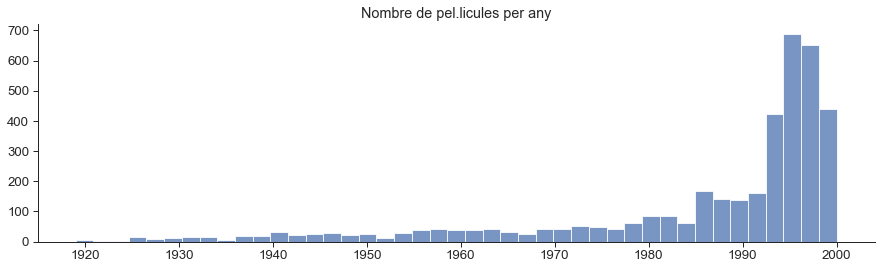

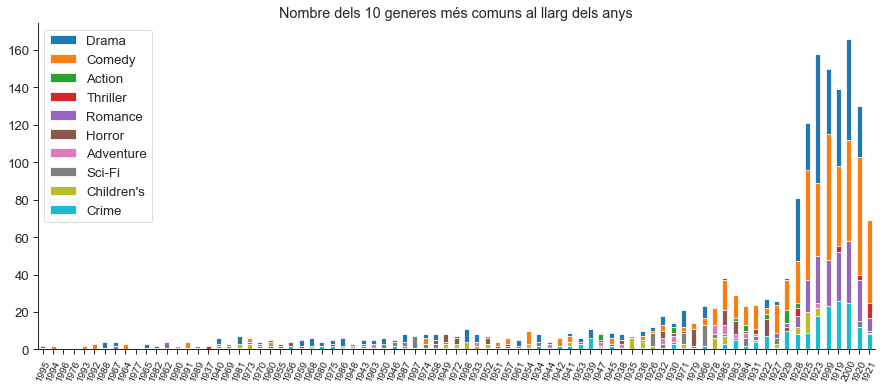

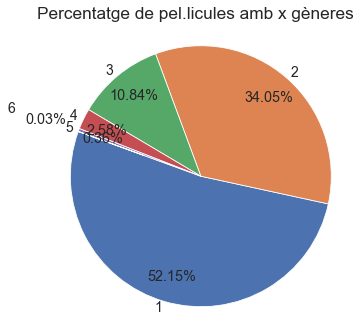

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

custom_params = {"axes.spines.right": False, "axes.spines.top": False} #, "axes.prop_cycle": cycler("tab10")
sns.set_theme(style="ticks", rc=custom_params)
sns.set_context("paper", font_scale=1.5)

movies = pd.read_csv('movies.dat', sep='::',
                     header=None, names=['movieid', 'movietitol', 'genere'], encoding='latin-1', engine='python')

separargeneres = movies['genere'].str.get_dummies()

movie_gen = (pd.concat([movies, separargeneres], axis=1)
                       .drop(["genere"], axis=1))

movie_gen["any"] = movie_gen["movietitol"].str[-5:-1].astype(int)
movie_gen["movietitol"] = movie_gen["movietitol"].str[:-7]


plt.figure(figsize=(15, 4))
sns.histplot(data = movie_gen, x = "any").set(title = "Nombre de pel.licules per any")
plt.ylabel("")
plt.xlabel("")
plt.show()

top10g = (movie_gen.iloc[:, 2:-1].sum().sort_values(ascending=False).head(10).index.values)


plt.rc('xtick', labelsize=10)
plt.figure(figsize=(15, 6))
cont=0
movie_ord = movie_gen.sort_values('any')  
for i in top10g:
    movie_ord.groupby("any")[i].sum().plot(kind = "bar", y = i, color=plt.cm.tab10.colors[cont], label = i, title = "Nombre dels 10 generes més comuns al llarg dels anys")
    cont +=1
plt.xticks(np.arange(len(movie_gen["any"].unique())), movie_gen["any"].unique(), rotation=65)
plt.xlabel("")
plt.legend()
plt.show()

movie_gen["numgeneres"] = movie_gen.iloc[:, 2:-1].sum(axis = 1)
plt.rc('xtick', labelsize=14)
movie_gen["numgeneres"].value_counts().plot(kind='pie', radius = 1.5, labeldistance=1.05, pctdistance = 0.8, startangle = 160, explode = (0, 0, 0, 0, 0, 0.7), autopct='%2.2f%%')
plt.suptitle("Percentatge de pel.licules amb x gèneres", y =1.09)
plt.ylabel("")
plt.show()
